In [42]:
import pickle

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [2]:
with open("D:\Programming\DP\models\System-Imbalance-Forecasting\data\data_TS\merged_data.pkl", 'rb') as file:
    ds_raw =  pickle.load(file)

## INFO

In [3]:
## time interval
print("Start:", ds_raw.datetime_utc.iloc[0])
print("End:", ds_raw.datetime_utc.iloc[-1])

Start: 2022-01-01 00:00:00
End: 2023-08-31 21:45:00


In [11]:
print("Nrows:", ds_raw.shape[0])

Nrows: 58360


## VARIABLES


In [13]:
ds_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58360 entries, 4 to 58363
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   datetime_utc                  58360 non-null  datetime64[ns]
 1   holiday                       58360 non-null  float64       
 2   not_working                   58360 non-null  float64       
 3   net_regulation_volume         58360 non-null  float64       
 4   system_imbalance              58360 non-null  float64       
 5   alpha                         58360 non-null  float64       
 6   marginal_incremental_price    58360 non-null  float64       
 7   marginal_decremental_price    58360 non-null  float64       
 8   positive_imbalance_price      58360 non-null  float64       
 9   negative_imbalance_price      58360 non-null  float64       
 10  measured_&_upscaled_solar     58360 non-null  float64       
 11  most_recent_forecast_solar  

In [ ]:
#ds_raw[["system_imbalance", "total_load", "measured_&_upscaled_solar", "measured_&_upscaled_wind"]].describe()
#ds_raw["measured_&_upscaled_wind"][ds_raw["measured_&_upscaled_wind"] < 0]


In [109]:
data_2023_05_07 = ds_raw[(ds_raw.datetime_utc >= "2023-05-07") & (ds_raw.datetime_utc < "2023-05-08")]

### System imbalance

In [21]:
ds_raw[["system_imbalance"]].describe()

,system_imbalance
count,58360.000000
mean,-28.147934
std,177.620584
min,-1329.973000
25%,-123.134750
50%,-22.596500
75%,70.345250
max,1135.153000


In [60]:
monthly_aggregate = ds_raw.set_index('datetime_utc', inplace=False)[["system_imbalance"]].resample('M').agg(['mean', 'std','max','min'])
latex_table = monthly_aggregate.round(2).style.to_latex()
print(latex_table)

\begin{tabular}{lrrrr}
 & \multicolumn{4}{r}{system_imbalance} \\
 & mean & std & max & min \\
datetime_utc &  &  &  &  \\
2022-01-31 00:00:00 & -39.140000 & 163.220000 & 495.910000 & -719.160000 \\
2022-02-28 00:00:00 & -3.860000 & 189.770000 & 755.110000 & -868.920000 \\
2022-03-31 00:00:00 & -34.900000 & 203.320000 & 1016.170000 & -1112.010000 \\
2022-04-30 00:00:00 & -31.260000 & 193.730000 & 1092.670000 & -989.580000 \\
2022-05-31 00:00:00 & -28.340000 & 198.700000 & 1100.840000 & -884.460000 \\
2022-06-30 00:00:00 & -49.420000 & 207.500000 & 892.160000 & -1329.970000 \\
2022-07-31 00:00:00 & -35.880000 & 180.480000 & 858.770000 & -1152.320000 \\
2022-08-31 00:00:00 & -73.460000 & 161.170000 & 597.960000 & -1267.640000 \\
2022-09-30 00:00:00 & 0.410000 & 178.250000 & 926.870000 & -676.830000 \\
2022-10-31 00:00:00 & 4.290000 & 192.250000 & 1135.150000 & -1308.680000 \\
2022-11-30 00:00:00 & -4.430000 & 173.320000 & 658.360000 & -970.290000 \\
2022-12-31 00:00:00 & -17.350000 & 166

In [ ]:
# Extract the month from the datetime for grouping
ds_raw["month_year"] = ds_raw['datetime_utc'].dt.to_period('M').astype(str)

# Create the box plot
fig = px.box(ds_raw, x='month_year', y='system_imbalance', title='Monthly System Imbalance Box Plots')

fig.update_traces(marker=dict(color='lightblue'))

# Customize x-axis (add x-ticks for each month and x-axis label)
fig.update_xaxes(tickvals=ds_raw['month_year'].unique(), ticktext=ds_raw['month_year'].unique(), title_text='Month')


# Show the plot
fig.show(config={'staticPlot': True})

In [65]:
for i in range(10):
    autocorrelation = ds_raw['system_imbalance'].autocorr(lag=i)
    print(f"Autocorrelation with lag {i}: {autocorrelation.round(3)}")

Autocorrelation with lag 0: 1.0
Autocorrelation with lag 1: 0.652
Autocorrelation with lag 2: 0.459
Autocorrelation with lag 3: 0.397
Autocorrelation with lag 4: 0.433
Autocorrelation with lag 5: 0.292
Autocorrelation with lag 6: 0.198
Autocorrelation with lag 7: 0.162
Autocorrelation with lag 8: 0.174
Autocorrelation with lag 9: 0.127


### Load

In [66]:
for i in range(10):
    autocorrelation = ds_raw['total_load'].autocorr(lag=i)
    print(f"Autocorrelation with lag {i}: {autocorrelation.round(3)}")

Autocorrelation with lag 0: 1.0
Autocorrelation with lag 1: 0.995
Autocorrelation with lag 2: 0.988
Autocorrelation with lag 3: 0.977
Autocorrelation with lag 4: 0.963
Autocorrelation with lag 5: 0.946
Autocorrelation with lag 6: 0.926
Autocorrelation with lag 7: 0.905
Autocorrelation with lag 8: 0.881
Autocorrelation with lag 9: 0.856


In [132]:
data_2023_05_07[['datetime_utc', "not_working"]]

,datetime_utc,not_working
47140,2023-05-07 00:00:00,1.0
47141,2023-05-07 00:15:00,1.0
47142,2023-05-07 00:30:00,1.0
47143,2023-05-07 00:45:00,1.0
47144,2023-05-07 01:00:00,1.0
...,...,...
47231,2023-05-07 22:45:00,0.0
47232,2023-05-07 23:00:00,0.0
47233,2023-05-07 23:15:00,0.0
47234,2023-05-07 23:30:00,0.0


In [127]:
# Create a line plot
fig = px.line(data_2023_05_07, x='datetime_utc', y='total_load', title='Total Load Over Time')

# Show the plot
fig.show()

In [139]:
data_2023_May[['datetime_utc', "not_working"]].iloc[40:96]

,datetime_utc,not_working
46604,2023-05-01 10:00:00,1.0
46605,2023-05-01 10:15:00,1.0
46606,2023-05-01 10:30:00,1.0
46607,2023-05-01 10:45:00,1.0
46608,2023-05-01 11:00:00,1.0
46609,2023-05-01 11:15:00,1.0
46610,2023-05-01 11:30:00,1.0
46611,2023-05-01 11:45:00,1.0
46612,2023-05-01 12:00:00,1.0
46613,2023-05-01 12:15:00,1.0


In [110]:
data_2023_May = ds_raw[(ds_raw.datetime_utc >= "2023-05-01") & (ds_raw.datetime_utc < "2023-06-01")]

In [126]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_2023_May['datetime_utc'], y=data_2023_May['total_load'],
                         mode='lines', name='Total Load (MW)'))

# Prepare the holiday data
holiday_data = data_2023_May['total_load'].copy()
# Set total_load to None for non-holiday points
holiday_data[(data_2023_May['holiday'] == 0) & (data_2023_May['not_working'] == 0)] = None

# Add the holiday plot
fig.add_trace(go.Scatter(x=data_2023_May['datetime_utc'], y=holiday_data,
                         mode='lines', name='Holidays/Non-Working Days', line=dict(color='red')))

# Update layout and show the plot
fig.update_layout(title='Total load over May 2023',
                  xaxis_title='Date', yaxis_title='Total Load (MW)',
                  legend=dict(x=1, y=1.2, xanchor='right', yanchor='top')
)


fig.show(config={'staticPlot': True})
pio.write_image(fig, 'load_May_plotly.pdf')

## GRAPHS

In [5]:
data_2023_05_07['datetime_utc']

47140   2023-05-07 00:00:00
47141   2023-05-07 00:15:00
47142   2023-05-07 00:30:00
47143   2023-05-07 00:45:00
47144   2023-05-07 01:00:00
                ...        
47231   2023-05-07 22:45:00
47232   2023-05-07 23:00:00
47233   2023-05-07 23:15:00
47234   2023-05-07 23:30:00
47235   2023-05-07 23:45:00
Name: datetime_utc, Length: 96, dtype: datetime64[ns]

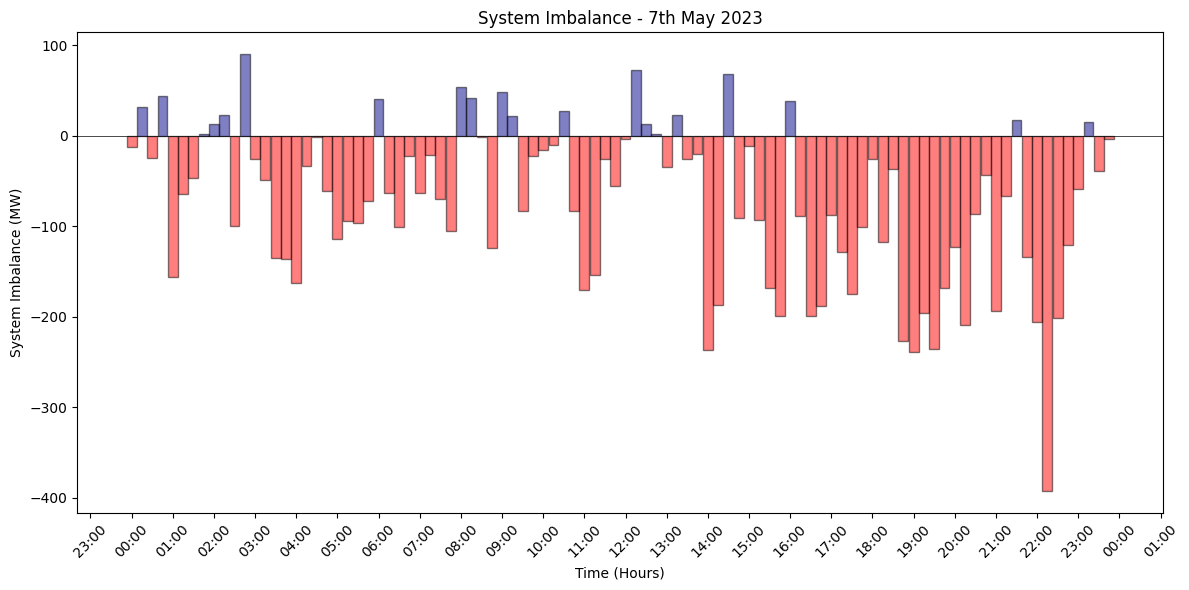

In [6]:
plt.figure(figsize=(12, 6))

positive = data_2023_05_07['system_imbalance'] >= 0
# Plotting bars for positive and negative values in different colors
plt.bar(data_2023_05_07['datetime_utc'][positive], data_2023_05_07['system_imbalance'][positive], 
        width=0.01, color='darkblue', alpha = 0.5, edgecolor='black', label='Positive Imbalance')
plt.bar(data_2023_05_07['datetime_utc'][~positive], data_2023_05_07['system_imbalance'][~positive],
         width=0.01, color='red', alpha = 0.5, edgecolor='black', label='Negative Imbalance')

plt.axhline(0, color='black', linewidth=0.5)

# Formatting the x-axis to show only hours
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.HourLocator())

# Adding labels and title
plt.xlabel('Time (Hours)')
plt.ylabel('System Imbalance (MW)')
plt.title('System Imbalance - 7th May 2023')
#plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("si.pdf")

plt.show()


In [8]:
# Creating a bar plot using Plotly
fig = go.Figure()

# Adding bars for positive and negative values with black edges
fig.add_trace(go.Bar(x=data_2023_05_07['datetime_utc'][positive], y=data_2023_05_07['system_imbalance'][positive],
                     marker=dict(color='darkblue', opacity=0.6, line=dict(color='black', width=1)),
                     name='Positive Imbalance'))
fig.add_trace(go.Bar(x=data_2023_05_07['datetime_utc'][~positive], y=data_2023_05_07['system_imbalance'][~positive],
                     marker=dict(color='red', opacity=0.6, line=dict(color='black', width=1)),
                     name='Negative Imbalance'))

# Adding a horizontal line at 0
fig.add_hline(y=0, line=dict(color='black', width=1.5))

# Setting the x-axis to show only hours
fig.update_xaxes(tickformat='%H:%M', tickmode='auto', nticks=24)

# Adding labels and title
fig.update_layout(
    title='System Imbalance - 7th May 2023',
    xaxis_title='Time (Hours)',
    yaxis_title='System Imbalance (MW)',
    bargap=0.05, # small gap between bars for better visualization
    showlegend=False
)

# Disable the interactivity
fig.show(config={'staticPlot': True})

pio.write_image(fig, 'si_plotly.pdf')


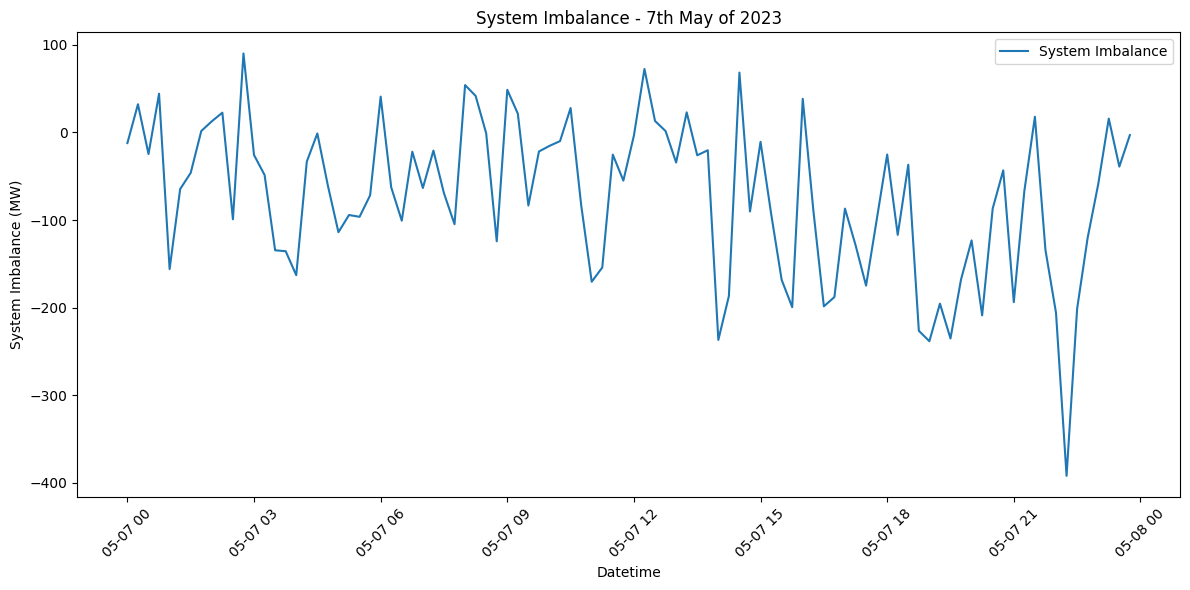

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(data_2023_05_07['datetime_utc'], data_2023_05_07['system_imbalance'], label='System Imbalance')
plt.xlabel('Datetime')
plt.ylabel('System Imbalance (MW)')
plt.title('System Imbalance - 7th May of 2023')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

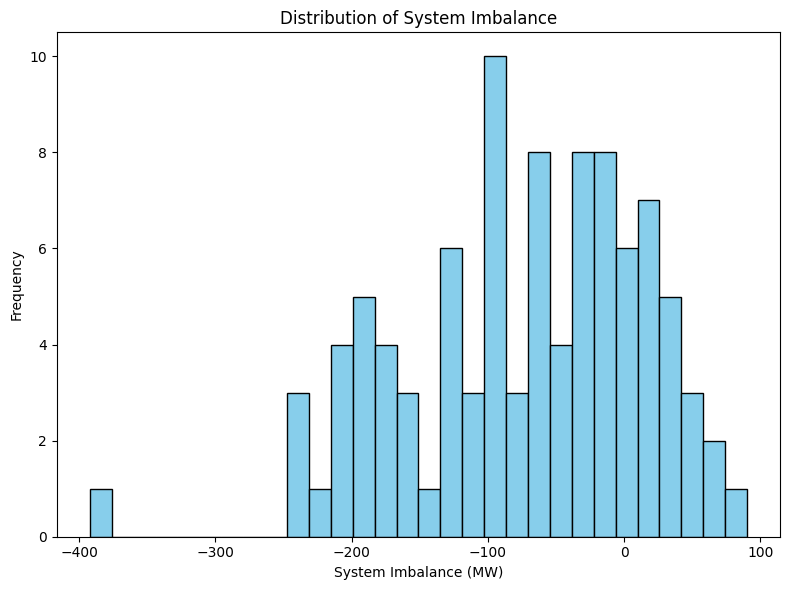

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(data_2023_05_07['system_imbalance'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('System Imbalance (MW)')
plt.ylabel('Frequency')
plt.title('Distribution of System Imbalance')
plt.grid(False)
plt.tight_layout()
plt.show()